In [2]:
import matplotlib.pyplot as plt
import IPython.display as Disp
from ipywidgets import widgets
import numpy as np
import cv2


In [3]:
class bbox_select():
    %matplotlib notebook 


    def __init__(self,im):
        self.im = im
        self.selected_points = []
        self.fig,ax = plt.subplots()
        self.img = ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        Disp.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)


        
    def poly_img(self,img,pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)),7)
        return img

    def onclick(self, event):
    #display(str(event))
        self.selected_points.append([event.xdata,event.ydata])
        if len(self.selected_points)>1:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))
    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)
    

In [4]:
im = plt.imread('./images/bote.jpg')

<IPython.core.display.Javascript object>


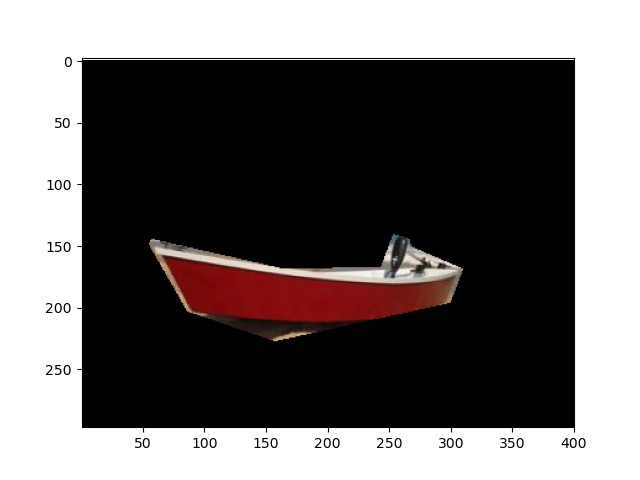

Button(description='Disconnect mpl', style=ButtonStyle())

In [5]:
bs = bbox_select(im)

In [8]:
bs.selected_points

[[57.17044959130227, 145.84739764325025],
 [163.50161842247113, 169.3863586822113],
 [243.858761279614, 168.574670370523],
 [253.5990210198737, 141.7889560848087],
 [266.58603400688673, 145.84739764325025],
 [267.397722318575, 151.52921582506843],
 [309.60551452636724, 169.3863586822113],
 [299.0535664744192, 196.17207296792557],
 [157.81980024065294, 227.01622881208144],
 [86.3912288120815, 203.4772677731204],
 [55.547072967925644, 149.0941508900035]]

In [9]:
arr = np.array([bs.selected_points],'int')
mask = cv2.fillPoly(np.zeros(im.shape,np.uint8),arr,[1,1,1])
op = np.multiply(im,mask)
plt.imshow(op)